In [ ]:
#import packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#Turn the csv file into a pandas dataframe
data = pd.read_csv('cleaned_spotify.csv')

In [ ]:
data #view cleaned_spotify dataframa

,artist_count,released_year,in_spotify_playlists,in_spotify_charts,streams,bpm,danceability_%,valence_%,energy_%,liveness_%,mode_Major,mode_Minor
0,2,2023,553,147,141381703,125,80,89,83,8,True,False
1,1,2023,1474,48,133716286,92,71,61,74,10,True,False
2,1,2023,1397,113,140003974,138,51,32,53,31,True,False
3,1,2019,7858,100,800840817,170,55,58,72,11,True,False
4,1,2023,3133,50,303236322,144,65,23,80,11,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
947,1,2022,953,0,91473363,144,60,24,39,8,True,False
948,1,2022,1180,0,121871870,166,42,7,24,12,True,False
949,2,2022,573,0,73513683,92,80,81,67,8,True,False
950,3,2022,1320,0,133895612,97,82,67,77,12,True,False


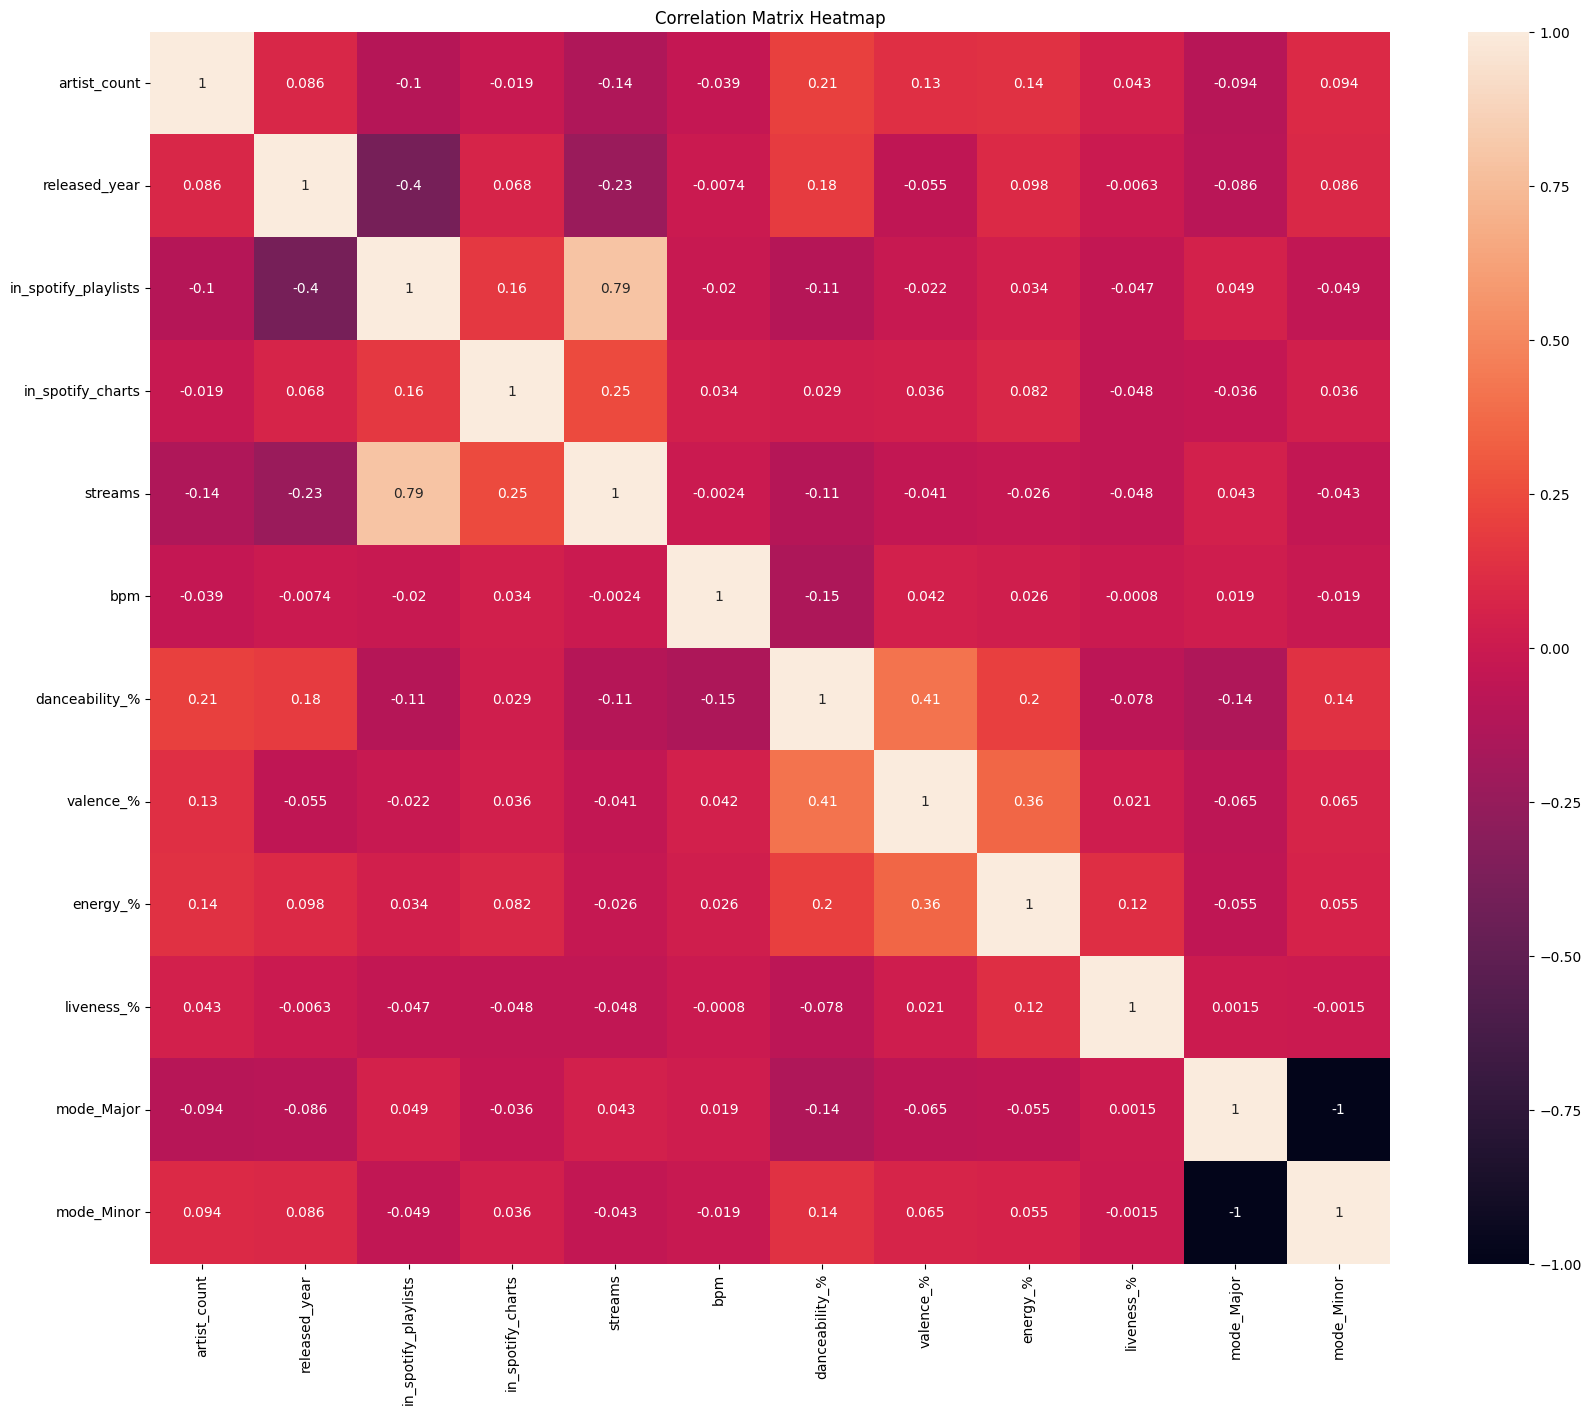

In [ ]:
#Create correlation matrix heatmap
corr_matrix = data.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.savefig("correlation_matrix.png") 
plt.show()

In [ ]:
#Split data into features and target variable
X = data.drop('in_spotify_charts',axis=1)
y = data['in_spotify_charts']

#Split the data into training and testing sets and reserve 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1325)

#Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Create a linear regression model and fit to training data
model = LinearRegression().fit(X_train, y_train)

#Make predictions on the test data
y_predicted = model.predict(X_test)

#Find model score
model.score(X_test, y_test)

0.0994424358903282

In [ ]:
#Find and report coefficients with labels
cdf=pd.DataFrame(model.coef_,X.columns, columns=["coefficients"])
print(cdf) #in_spotify_playlist has a negative coefficient, but steams has a  high coefficient

                      coefficients
artist_count             -0.012628
released_year             2.342627
in_spotify_playlists     -0.769389
streams                   5.421305
bpm                       0.170456
danceability_%            0.738581
valence_%                 0.924362
energy_%                  0.435390
liveness_%               -0.443887
mode_Major               -0.005553
mode_Minor                0.005553


In [76]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 417.4315364797391


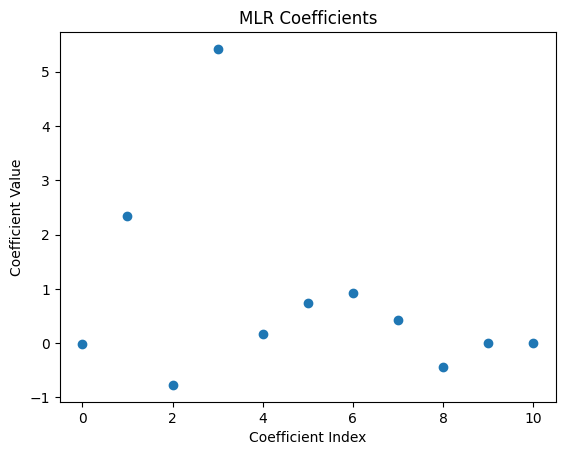

In [75]:
coeffs = model.coef_
plt.scatter(range(len(coeffs)), coeffs)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("MLR Coefficients")
plt.savefig("mlr_coefficients.png") 
plt.show()

In [ ]:
#Create Lasso regression model and fit to training data
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X, y)
cdf=pd.DataFrame(lasso.coef_,X.columns, columns=["coefficients"])
print(cdf)

#in_spotify_playlists still has a negative effect on in_spotify_charts

                      coefficients
artist_count         -0.000000e+00
released_year         2.008044e-01
in_spotify_playlists -6.018758e-05
streams               1.013415e-08
bpm                   2.294040e-02
danceability_%        1.729652e-02
valence_%             1.736638e-02
energy_%              8.285700e-02
liveness_%           -5.392012e-02
mode_Major           -0.000000e+00
mode_Minor            0.000000e+00


In [17]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
alphas=[0.001, 0.01, 0.1, 1, 10, 100]
l1_ratios=[0.1, 0.3, 0.5, 0.7, 0.9]
param_grid={'alpha': alphas, 'l1_ratio' : l1_ratios}
grid_search=GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params=grid_search.best_params_


In [19]:
from sklearn.metrics import mean_squared_error
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 371.0292458721597


In [ ]:
#Find and report coefficients with labels
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(best_model.coef_)
print(coeff_df)


                 Feature  Coefficient Estimate
0           artist_count             -0.000000
1          released_year              2.327440
2   in_spotify_playlists             -0.211941
3                streams              4.823769
4                    bpm              0.079936
5         danceability_%              0.676570
6              valence_%              0.865875
7               energy_%              0.318057
8             liveness_%             -0.333229
9             mode_Major             -0.000000
10            mode_Minor              0.000000


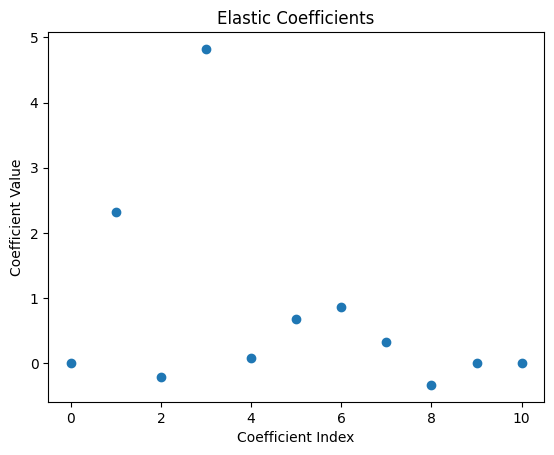

In [32]:
coefficients = best_model.coef_
plt.scatter(range(len(coefficients)), coefficients)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Elastic Coefficients")
plt.savefig("elastic_coefficients.png") 
plt.show()

In [78]:
# regression = LinearRegression().fit(X_train, y_train)
y_predicted = regression.predict(X_test)
X = data.drop(['in_spotify_charts', 'in_spotify_playlists'], axis=1)
y = data['in_spotify_charts']

#split into training and test set
#stratification can be really helpful. It tries to split the test
#using MEDV because it represents the dataset well 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state=12345)

#Standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

regression = LinearRegression().fit(X_train, y_train)
y_predicted = regression.predict(X_test)

In [79]:
# Test regression score
regression.score(X_test, y_test)

0.09842719346317086

In [80]:
coeff_data = pd.DataFrame(X.columns)
coeff_data.columns = ["Feature"]
coeff_data["Coefficient Estimate"] = pd.Series(regression.coef_)
print(coeff_data)


          Feature  Coefficient Estimate
0    artist_count             -0.153969
1   released_year              2.410140
2         streams              5.112003
3             bpm              0.272069
4  danceability_%              0.629000
5       valence_%              0.097688
6        energy_%              1.180426
7      liveness_%             -0.125045
8      mode_Major             -0.296177
9      mode_Minor              0.296177


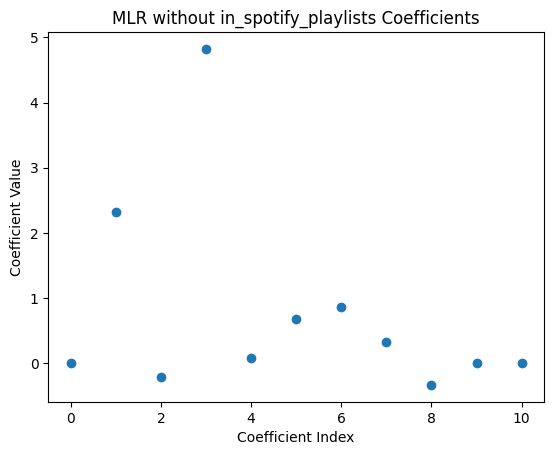

In [81]:
coeff = best_model.coef_
plt.scatter(range(len(coeff)), coeff)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("MLR without in_spotify_playlists Coefficients")
plt.savefig("mlr_no_playlist_coefficients.png") 
plt.show()

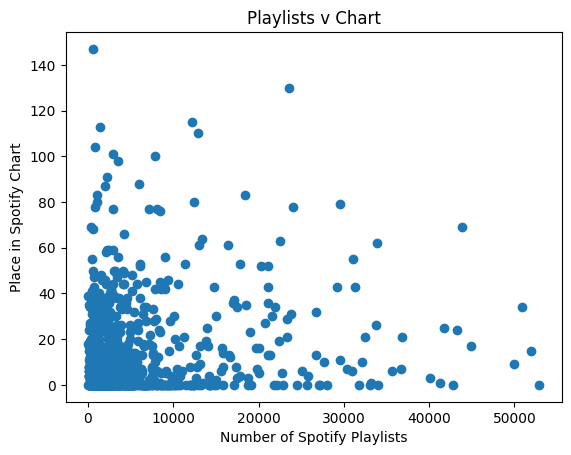

In [84]:
a = data['in_spotify_playlists']
b = data['in_spotify_charts']

plt.scatter(a, b)
plt.xlabel("Number of Spotify Playlists")
plt.ylabel("Place in Spotify Chart")
plt.title("Playlists v Chart")
plt.savefig("playlist_v_chart.png") 
plt.show()
